In [48]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
UL = float(input('please insert the left value of U:'))
UR = float(input('please insert the right value of U:'))
rho_L = float(input('please insert the left value of density:'))
rho_R = float(input('please insert the right value of density:'))
a = float(input('please insert the  value of a:')) 
Time  = float(input('please insert the time  between zero and infinity(for example 10):'))
Delta_T = float(input('please insert the time interval between each computing point:'))
X_interval = float(input('please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:'))
Delta_X = float(input('please insert the x interval between each computing point:'))

please insert the left value of U:2
please insert the right value of U:-2
please insert the left value of density:2
please insert the right value of density:2
please insert the  value of a:1
please insert the time  between zero and infinity(for example 10):10
please insert the time interval between each computing point:1
please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:10
please insert the x interval between each computing point:0.01


In [3]:
def density_left(rho_m):
    
    if rho_m > rho_L:
        f = UL-a*math.sqrt((rho_L/rho_m)+(rho_m/rho_L)-2)
    if rho_m < rho_L:
        f = -a*(math.log(rho_m/rho_L)- UL/a)
    if rho_m == rho_L:
        f = np.nan
    
    return f
         

def density_right(rho_m):
    
        
    if rho_m > rho_R:
        f = UR + a*math.sqrt((rho_R/rho_m)+(rho_m/rho_R)-2)
    if rho_m < rho_R:
        f = a*(math.log(rho_m/rho_R)+ UR/a)
    if rho_m == rho_L:
        f = np.nan
    return f
    
def density_minus(rho_m):
    f = density_left(rho_m) - density_right(rho_m)
    return f

def density_left_der(rho_m):
    if rho_m > rho_L:
        f = (-a/2)*(1/math.sqrt((rho_L/rho_m)+(rho_m/rho_L)-2))*((-rho_L/rho_m**2)+(1/rho_L))
    if rho_m < rho_L:
        f = -a/rho_m
    if rho_m == rho_L:
        f = np.nan
    return f
def density_right_der(rho_m):
    if rho_m > rho_R:
        f = (a/2)*(1/math.sqrt((rho_R/rho_m)+(rho_m/rho_R)-2))*((-rho_R/rho_m**2)+(1/rho_R))
    if rho_m < rho_R:
        f = a/rho_m
    if rho_m == rho_R:
        f = np.nan
    return f 
def density_minus_der(rho_m):
    f = density_left_der(rho_m) - density_right_der(rho_m)
    return f
        
    
    

In [54]:
x1 = (rho_L+rho_R)/2
x2 = (rho_L+rho_R)/2-1
i=0
while abs(x1-x2) > 0.01:
    i=i+1
    x1 = x2
    x2 = x1 - (density_minus(x1)/density_minus_der(x1))
    
print(i)

5


In [55]:
x2

11.656854022592173

In [56]:
T = np.arange(0,Time,Delta_T)
X = np.arange(-X_interval,X_interval+1,Delta_X)

In [57]:
rho_m = x2

U1_columns = []
for x in X:
    U1_columns.append('U_{}'.format(int(x)))
U2_columns = []
for x in X:
    U2_columns.append('U_{}'.format(int(x)))
    
U1_database =  pd.DataFrame(columns=U1_columns)
U1_database = pd.concat([U1_database,pd.DataFrame(columns=U1_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)
U2_database =  pd.DataFrame(columns=U2_columns)
U2_database = pd.concat([U2_database,pd.DataFrame(columns=U2_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)



if (rho_m > rho_R) and (rho_m > rho_L):
    
    print('All_shock_wave')
    Um = UR+(a*math.sqrt((rho_R/rho_m)+(rho_m/rho_R)-2))
    
    s1 = (rho_m*Um - rho_L*UL)/(rho_m-rho_L)
    s2 = (rho_m*Um - rho_R*UR)/(rho_m-rho_R)
    
    for t in T:
        
        U1 = np.array([0])
        U2 = np.array([0])
        
        for x in X:
            
            if (x==0) and (t==0):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
            
            if x/t>s2:    
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
            if ((x/t)<s2) and ((x/t)>s1):
                U1 = np.append(U1,rho_m)
                U2 = np.append(U2,Um)
            if (x/t) < s1:
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
            if ((x/t)==s2) or ((x/t)==s1):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
            
        U1 = U1[1:]
        U2 = U2[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        
       
if (rho_m < rho_R) and (rho_m < rho_L):
    
    print('All_rarefaction')
    
    Um = a*(math.log(rho_m/rho_R)+(UR/a))
    E11 = UL-a
    E12 = Um-a
    E21 = Um+a
    E22 = UR+a
        
    for t in T:
        
        U1 = np.array([])
        U2 = np.array([])
        
        for x in X:
            
            if (x==0) and (t==0):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
            
            if ((x/t)>E22):    
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                
            if ((x/t)<E22) and ((x/t)>E21):
                k = rho_R*math.exp(((x/t)-UR-a)/a)
                U1 = np.append(U1,k)
                U2 = np.append(U2,a*(math.log(k/rho_R)+(UR/a)))
                
            if ((x/t) > E12) and ((x/t)<E21):
                
                U1 = np.append(U1,rho_m)
                U2 = np.append(U2,Um)
                
            if ((x/t) > E11) and ((x/t)<E12):
                k1 = rho_L*math.exp((UL-a-(x/t))/a)
                U1 = np.append(U1,k1)
                U2 = np.append(U2,-a*(math.log(k1/rho_L)-(UL/a)))
            if ((x/t)) < E11:
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
            
            if ((x/t)==E11) or ((x/t)==E12) or ((x/t)==E21) or ((x/t)==E22) :
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                
                
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        
if (rho_m > rho_R) and (rho_m < rho_L):
    
    print('Rarefaction_Shock wave')
    
    Um = UR+(a*math.sqrt((rho_R/rho_m)+(rho_m/rho_R)-2))
    s_shock=(rho_m*Um - rho_R*UR)/(rho_m-rho_R)
    E1 = UL-a
    E2 = Um-a
    
    for t in T:
        
        U1 = np.array([])
        U2 = np.array([])
       
        for x in X:
            
            if (x==0) and (t==0):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
        
            if ((x/t)>s_shock):    
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                
            if ((x/t)<s_shock) and ((x/t)>E2):
                U1 = np.append(U1,rho_m)
                U2 = np.append(U2,Um)
                
            if ((x/t) > E1) and ((x/t)<E2):
                k = rho_L*math.exp((UL-a-(x/t))/a)
                U1 = np.append(U1,k)
                U2 = np.append(U2,-a*(math.log(k/rho_L)-(UL/a)))
                
            if ((x/t)<E1):
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                
                
            if ((x/t)==s_shock) or ((x/t)==E1) or ((x/t)==E2):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                
           
        
        
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        
if (rho_m < rho_R) and (rho_m > rho_L):
    
    print('shock_rarefaction')
    
    Um = a*(math.log(rho_m/rho_R)+(UR/a))
    s_shock = (rho_m*Um-rho_L*UL)/(rho_m-rho_L)
    E21 = Um+a
    E22 = UL+a
    
    for t in T:
        
        U1 = np.array([])
        U2 = np.array([])
        
        for x in X:
            
            if (x==0) and (t==0):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
            
            if ((x/t)>E22):    
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                
                
            if ((x/t) > E21) and ((x/t)<E22):
                k = rho_R*math.exp(((x/t)-UR-a)/a)
                U1 = np.append(U1,k)
                U2 = np.append(U2,math.log(k/rho_R)+UR)
            
            if ((x/t)<E21) and ((x/t)>s_shock):
                U1 = np.append(U1,rho_m)
                U2 = np.append(U2,Um)
                
            if ((x/t)<s_shock):
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
            
            if ((x/t)==s_shock) or ((x/t)==E21) or ((x/t)==E22):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
           
                
                  
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
    
        
        
        
        
U1_database.set_index(np.append(np.array(['x']),T),inplace=True)
U2_database.set_index(np.append(np.array(['x']),T),inplace=True)   

All_shock_wave


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars


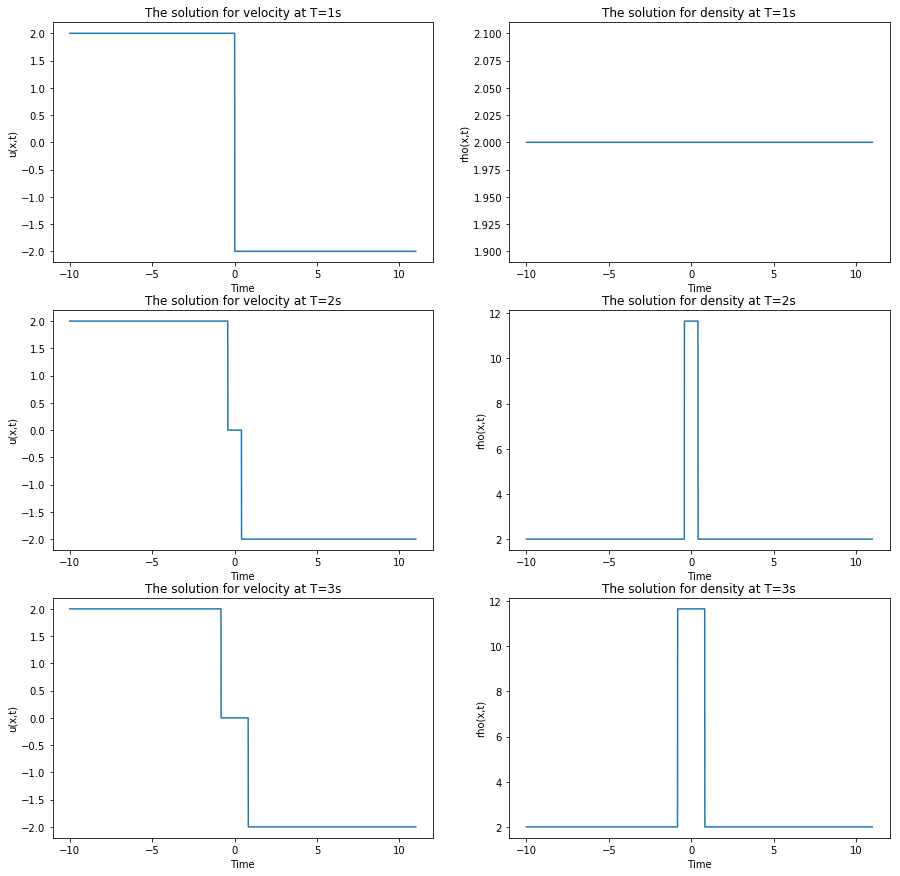

In [58]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
axes[0,0].plot(U2_database.iloc[0],U2_database.iloc[1])
axes[0,0].set_title('The solution for velocity at T=1s')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('u(x,t)')


axes[1,0].plot(U2_database.iloc[0],U2_database.iloc[2])
axes[1,0].set_title('The solution for velocity at T=2s')
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('u(x,t)')


axes[2,0].plot(U2_database.iloc[0],U2_database.iloc[3])
axes[2,0].set_title('The solution for velocity at T=3s')
axes[2,0].set_xlabel('Time')
axes[2,0].set_ylabel('u(x,t)')


axes[0,1].plot(U1_database.iloc[0],U1_database.iloc[1])
axes[0,1].set_title('The solution for density at T=1s')
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('rho(x,t)')


axes[1,1].plot(U1_database.iloc[0],U1_database.iloc[2])
axes[1,1].set_title('The solution for density at T=2s')
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('rho(x,t)')

axes[2,1].plot(U1_database.iloc[0],U1_database.iloc[3])
axes[2,1].set_title('The solution for density at T=3s')
axes[2,1].set_xlabel('Time')
axes[2,1].set_ylabel('rho(x,t)')

plt.savefig('r1.png')

plt.show()